Face recognition code on Yalefaces dataset

In [ ]:
! pip install face_recognition

     |████████████████████████████████| 100.2MB 39kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=77a768c13c9c06188165fd62a1222d3b131da638a1f35ac8c8bb0fcbbb4b797c
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
#PAckage import
import pandas as pd 
from PIL import Image,ImageDraw
import numpy as np 
from numpy import *
import matplotlib.pyplot as plt
from numpy import linalg as la
import glob
import math
import random
from collections import Counter

#Face recognition packages
import dlib
import face_recognition
import face_recognition_models

Data import and overview

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


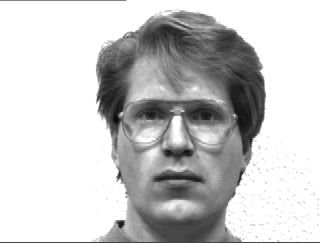

In [ ]:
#To be MODIFIED
Global_path_directory='/content/gdrive/MyDrive/IA-confidentielle-master/yalefaces_v1/'
#First images 
test=Image.open(Global_path_directory + 'subject01.glasses.gif')
#/content/gdrive/MyDrive/IA-confidentielle-master/yalefaces_v1/subject01.glasses.gif
test

# PCA Test

In [ ]:
def loadImageSet(path_directory, testlength=4):
  filenames = glob.glob(path_directory + '*') # 164
  filenames.sort()
  
  nameList = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15']  # 
  characteristics = ['centerlight','glasses','happy','leftlight','noglasses','rightlight','sad','sleepy','surprised','wink']
  
  # randomly choose testlength people; for each of them, randomly choose 1 characteristic to test dataset
  testfiles = []
  testpeople = random.sample(nameList, testlength)
  for person in testpeople:
    testch = random.choice(characteristics)
    while path_directory + 'subject' + str(person) + '.' + testch + '.gif' not in filenames:
      testch = random.choice(characteristics)
    testfile = path_directory + 'subject' + str(person) + '.' + testch + '.gif'
    testfiles.append(testfile)
    filenames.remove(testfile)
      
  img = [Image.open(fn).convert('L').resize((98, 116)) for fn in filenames]
  TrainFaceMat = np.asarray([np.array(im).flatten() for im in img])

  img2 = [Image.open(fn).convert('L').resize((98, 116)) for fn in testfiles]
  TestFaceMat = np.asarray([np.array(im).flatten() for im in img2])

  #print(TrainFaceMat.shape, TestFaceMat.shape)

  return TrainFaceMat, TestFaceMat, filenames, testfiles

In [ ]:
def PCA_Test(times=100, testlength=4, path = Global_path_directory):
  aaaaaaaaaverage = 0
  for time in range(times):

    TrainFaceMat, TestFaceMat, filenames, testfiles = loadImageSet(path, testlength)

    #############################################################################################
    # build eigenspaces
    #############################################################################################

    avgImg = mean(TrainFaceMat,0) # mean
    diffTrain = TrainFaceMat-avgImg  # difference from mean
    covMat =np.asmatrix(diffTrain) * np.asmatrix(diffTrain.T)  # use difference to calculate covariance matrix C= XXT
    # since C would be very big and cause memory error, we calculate C’ = XTX instead

    #step4: calculate eigenvector of covariance matrix 
    eigvals,eigVects = linalg.eig(covMat) #la.linalg.eig(np.mat(covMat))

    eigSortIndex = argsort(-eigvals) # inverse sort

    selecthr = 0.8  # set a threshold
    for i in range(shape(TrainFaceMat)[0]):
      if (eigvals[eigSortIndex[:i]]/eigvals.sum()).sum() >= selecthr:
        eigSortIndex = eigSortIndex[:i]
        break # choose the first i eigenvectors E’ corresponding to 80% of eigenvalues' sum

    covVects = diffTrain.T * eigVects[:,eigSortIndex] # difference.T * eigenvectors = real covariance's eigenvectors
    # covVects is the eigenvector of covariance matrix, XE’= E
    #print(covVects.shape)
    covVects = covVects / covVects.max(axis=0) # nomalization

    #############################################################################################
    # test
    #############################################################################################

    count = 0

    for test in range(testlength):

      # flatten to 1d array
      judgeImg = TestFaceMat[test]

      # Map it to the eigenface space
      diff = judgeImg - avgImg
      diff.shape += (1,)
      weiVec = covVects.T * diff #.T

      res = 0
      resVal = inf
      for j in range(diffTrain.shape[0]):
        difftrain = np.empty_like (diffTrain[j])
        difftrain[:] = diffTrain[j]
        difftrain.shape += (1,)

        TrainVec = covVects.T * difftrain

        if (array(weiVec-TrainVec)**2).sum() < resVal:
          res = j
          resVal = (array(weiVec-TrainVec)**2).sum()

      if (filenames[res].split('.')[-3][-2:])==(testfiles[test].split('.')[-3][-2:]):
        count += 1
      #else:
        #print(filenames[res].split('.')[-3][-2:], testfiles[test].split('.')[-3][-2:])

    #print('Accuracy: ', count / testlength)
    aaaaaaaaaverage += count / testlength
  return aaaaaaaaaverage/times

In [ ]:
accuracy = PCA_Test(times=100, testlength=4)

KeyboardInterrupt: ignored

In [ ]:
print('aaaaaaaaaverage : %f' % (accuracy))

aaaaaaaaaverage : 0.707500


# Face recognition Test

In [ ]:
def loadImageSet2(path_directory, testlength=4):
  filenames = glob.glob(path_directory + '*') # 164
  filenames.sort()
  
  nameList = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15']  # 
  characteristics = ['centerlight','glasses','happy','leftlight','noglasses','rightlight','sad','sleepy','surprised','wink']
  
  # randomly choose testlength people; for each of them, randomly choose 1 characteristic to test dataset
  testfiles = []
  testpeople = random.sample(nameList, testlength)
  for person in testpeople:
    testch = random.choice(characteristics)
    while path_directory + 'subject' + str(person) + '.' + testch + '.gif' not in filenames:
      testch = random.choice(characteristics)
    testfile = path_directory + 'subject' + str(person) + '.' + testch + '.gif'
    testfiles.append(testfile)
    filenames.remove(testfile)
      
  return filenames, testfiles

In [ ]:
def FaceRecg_Test(times=100, testlength=4, path = Global_path_directory):
  aaaaaaaaaverage = 0
  for time in range(times):
    ##################################################################
    # Known
    ##################################################################
    trainfiles, testfiles = loadImageSet2(path_directory=path, testlength=4)
    knwon_face_encodings = []
    for im in trainfiles:
      try:
        image = face_recognition.load_image_file(im) # Load photo
        face_locations = face_recognition.face_locations(image) # detect faces
        face_location = face_locations[0] # Only use the first detected face
        face_encodings = face_recognition.face_encodings(image, [face_location])
        known_face_encoding = face_encodings[0]  # Pull out the one returned face encoding
        knwon_face_encodings.append(known_face_encoding)
      except:
        trainfiles.remove(im)
        pass

    ##################################################################
    # Test
    ##################################################################
    countright = 0
    for im in testfiles:
      image = face_recognition.load_image_file(im)
      unknwon_face_encodings = face_recognition.face_encodings(image)
      if len(unknwon_face_encodings) == 1:
        unknwon_face_encoding = unknwon_face_encodings[0]
        matches = face_recognition.compare_faces(
            knwon_face_encodings,  # The known face encodings (can be only 1 - less is faster)
            unknwon_face_encoding  # The single unknown face encoding
        )
        trueindexes = [i for i, x in enumerate(matches) if x]
        truetrains = [trainfiles[j] for j in trueindexes]
        truepeople = [z.split('.')[-3][-2:] for z in truetrains]
        result = Counter(truepeople)
        #print(result)
        outputperson = max(result,key=result.get)
        #print(outputperson, im.split('.')[-3][-2:])
        if int(outputperson) == int(im.split('.')[-3][-2:]):
          countright += 1
    acc = countright / (len(testfiles))
    print(acc)
    aaaaaaaaaverage += acc
  return aaaaaaaaaverage/times
    

In [ ]:
accuracy = FaceRecg_Test(times=15, testlength=4)

1.0
1.0
0.75
0.75
0.75
0.75
1.0
1.0
0.5
0.75
1.0
0.75
1.0
1.0
1.0


In [ ]:
print('aaaaaaaaaverage : %f' % (accuracy))

aaaaaaaaaverage : 0.866667


# Convert to PNG

In [ ]:
import cv2
from PIL import Image
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [ ]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(Global_path_directory) if isfile(join(Global_path_directory, f))]

In [ ]:
for f in onlyfiles:
  if 'gif' in f:
    gif = cv2.VideoCapture(Global_path_directory + f)
    ret,frame = gif.read() # ret=True if it finds a frame else False. Since your gif contains only one frame, the next read() will give you ret=False
    img = Image.fromarray(frame)
    img = img.convert('RGB')
    img.save('gdrive/MyDrive/IA-confidentielle-master/yalefaces_v1_PNG/' + f[:-4] + '.png')

# Differential Privacy

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 1.x
except Exception:
  pass

import tensorflow as tf

import numpy as np

tf.compat.v1.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
!pip install tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy
from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPGradientDescentGaussianOptimizer

## read all the images with opencv

In [ ]:
import glob
import cv2

images = [cv2.imread(file) for file in glob.glob("gdrive/MyDrive/IA-confidentielle-master/yalefaces_v1_PNG/*.png")]

In [ ]:
len(images), images[53].shape

(164, (243, 320, 3))

In [ ]:
data = np.array(images) 

In [ ]:
data[24].shape

(243, 320, 3)

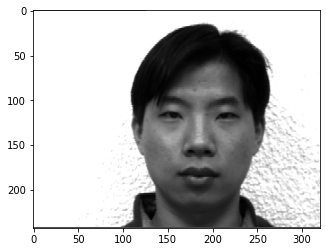

In [ ]:
plt.imshow(data[24])

## add noise

In [ ]:
def laplaceMechanism(x, epsilon):
  b = np.random.laplace(0, 1.0/epsilon, data[0].shape)
  np.add(x, b, out=x, casting="unsafe")
  return x


In [ ]:
for i in range(164):
  data[i]=laplaceMechanism(data[i],epsilon=2)

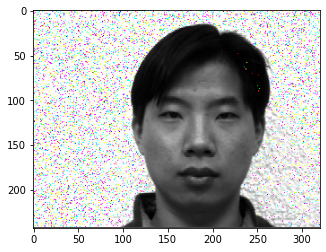

In [ ]:
plt.imshow(data[24])

## save

In [ ]:
import os
import glob

files = glob.glob('gdrive/MyDrive/IA-confidentielle-master/yalefaces_v1_noised/*')
for f in files:
    os.remove(f)

In [ ]:
names = glob.glob("gdrive/MyDrive/IA-confidentielle-master/yalefaces_v1_PNG/*.png")

In [ ]:
from PIL import Image

In [ ]:
for i in range(164):
  name = names[i]
  image_noise = data[i]
  #print(image_noise.shape)
  im = Image.fromarray(image_noise)
  #scipy.misc.imsave('gdrive/MyDrive/IA-confidentielle-master/yalefaces_v1_noised/' + name[:-4] + '.gif', image_noise)
  im.save('gdrive/MyDrive/IA-confidentielle-master/yalefaces_v1_noised/' + name.split('/')[-1][:-4] + '.gif')

## Classification Test

In [ ]:
accuracy = FaceRecg_Test(times=15, testlength=4, path = 'gdrive/MyDrive/IA-confidentielle-master/yalefaces_v1_noised/')

0.75
0.75
0.5
0.75
1.0
0.75
0.75
1.0
0.25
0.25
0.0
0.0
0.25
0.0
0.75


In [ ]:
accuracy

0.5166666666666667